In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
import pandas as pd

In [15]:
y = np.array([1, 2, 2, 3, 5, 6])
y_pred = np.array([5, 2, 2, 5, 7, 1000])

print(f'MAE: {mean_absolute_error(y,y_pred)}')
print(f'MSE: {mean_squared_error(y,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y,y_pred))}')
print(f'median abs err: {median_absolute_error(y,y_pred)}')

MAE: 167.0
MSE: 164676.66666666666
RMSE: 405.80372924194114
median abs err: 2.0


In [17]:
from sklearn.linear_model import LinearRegression

In [27]:
boston = pd.read_csv('boston_house_prices.csv', header=None)
boston.columns = boston.iloc[1]  # Assigner la 1ère ligne comme header
boston = boston[2:]  # Supprimer la 1ère ligne devenue header
boston.reset_index(drop=True, inplace=True)
boston.head()

1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


In [50]:
boston.info()
boston = boston.apply(pd.to_numeric, errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [51]:
y = boston['MEDV']
X = boston.drop('MEDV', axis=1)

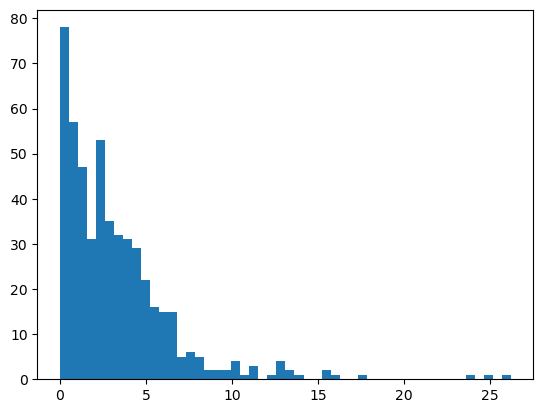

In [53]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

err_hist = np.abs(y-y_pred)
plt.hist(err_hist, bins=50)
plt.show()

In [57]:
model.score(X, y)

0.7406426641094095

In [62]:
from sklearn.model_selection import cross_val_score

In [68]:
cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_squared_error')

array([ -20.63230588,  -34.48294871, -451.90968255])

In [72]:
from sklearn.metrics._scorer import SCORERS
sorted(SCORERS.keys())

ImportError: cannot import name 'SCORERS' from 'sklearn.metrics._scorer' (C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py)

In [71]:
sorted(sklearn.metrics.SCORERS.keys())

AttributeError: module 'sklearn.metrics' has no attribute 'SCORERS'